<a href="https://colab.research.google.com/github/SahilCarterr/Impainting-Diffusers/blob/update_code/Image_Objects_Upgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
#!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
import numpy as np
import matplotlib.pyplot as plt
import cv2
! pip install diffusers xformers transformers scipy ftfy accelerate controlnet_aux

PyTorch version: 2.2.1+cu121
Torchvision version: 0.17.1+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-c6j9yyey
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-c6j9yyey
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=0fab6939ee5734b269c3ff02c6005112136caed801caf5f5c8d620cf86242c96
  Stored in directory: /tmp/pip-ephem-wheel-cache-8c0x7wko/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2024-04-28 14:33:48--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com

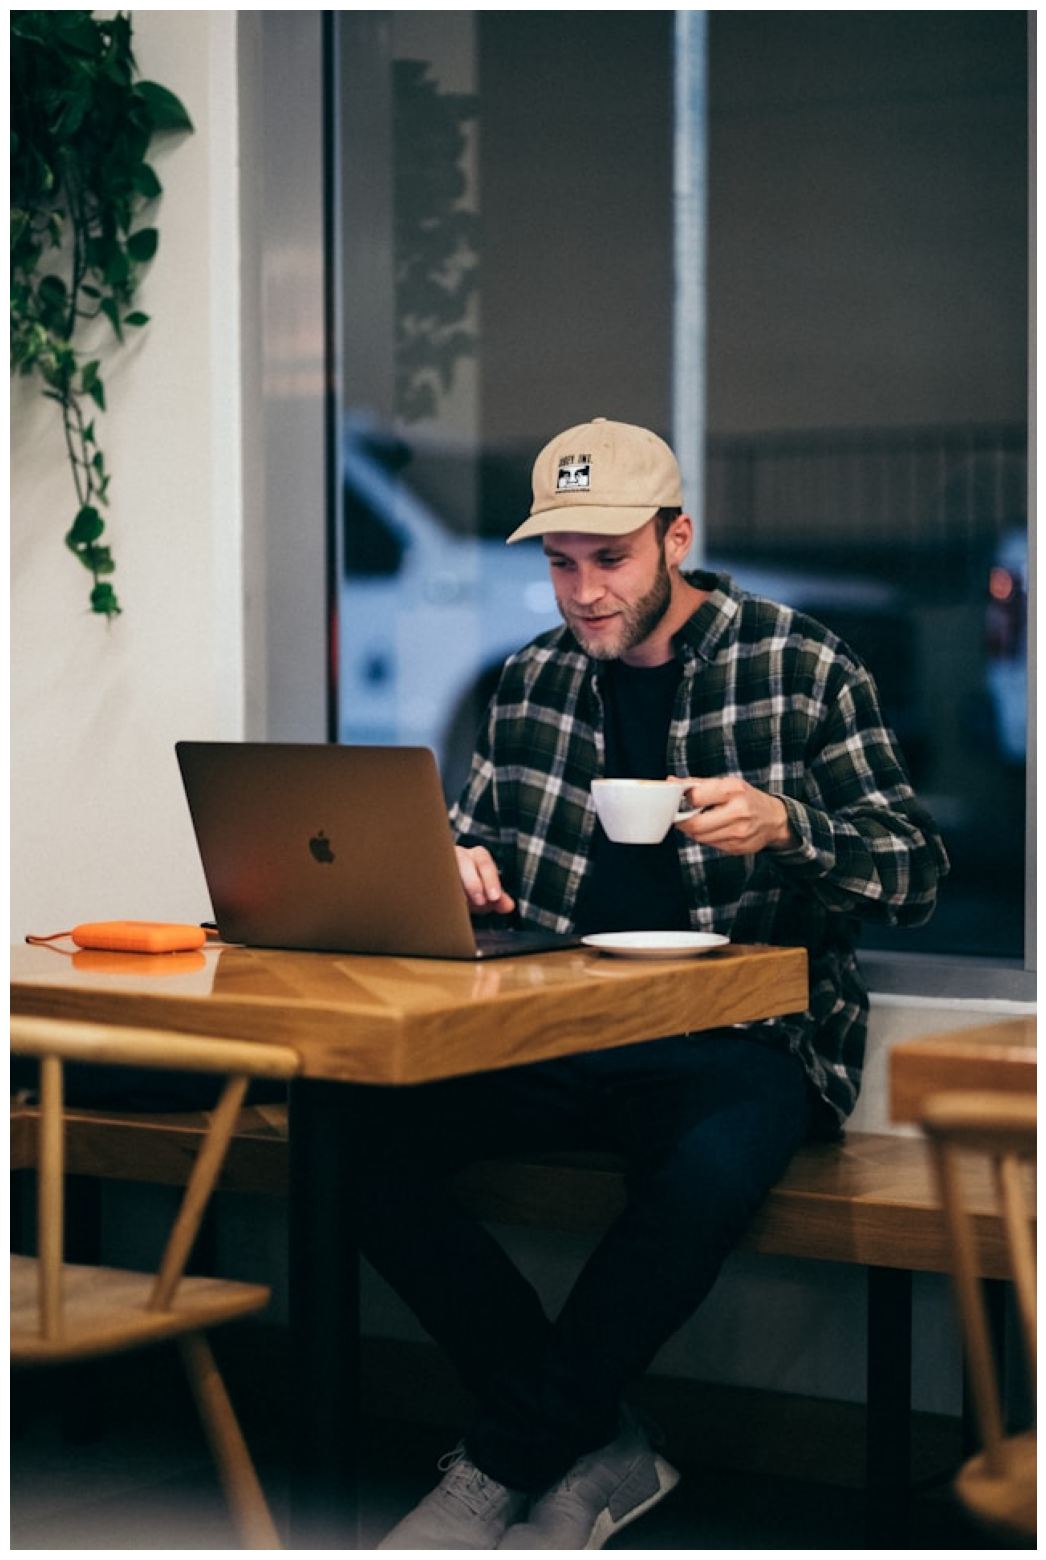

In [3]:
image = cv2.imread('man.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

In [5]:
masks[0].keys()

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

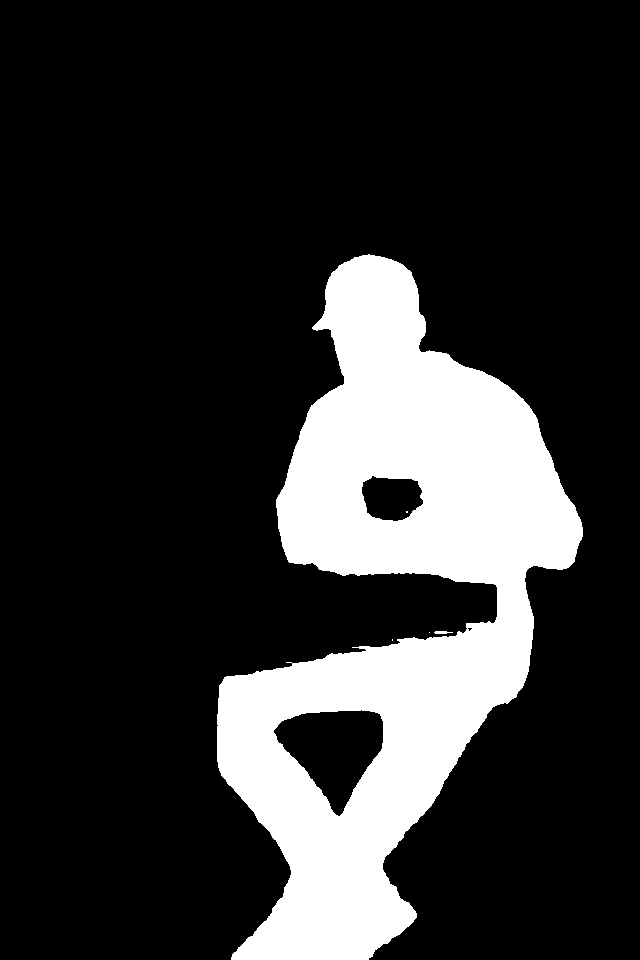

In [6]:
from PIL import Image
mask = Image.fromarray(masks[0]["segmentation"])
mask

In [7]:
#create a folder masks and save all masks  from masks[i]["segmentation"]
import os
from PIL import Image
os.makedirs("masks", exist_ok=True)
for i in range(len(masks)):
    if(masks[i]["predicted_iou"]>=0.99):
      mask = Image.fromarray(masks[i]["segmentation"])
      mask.save(f"masks/{i}.png")
      mask.show()

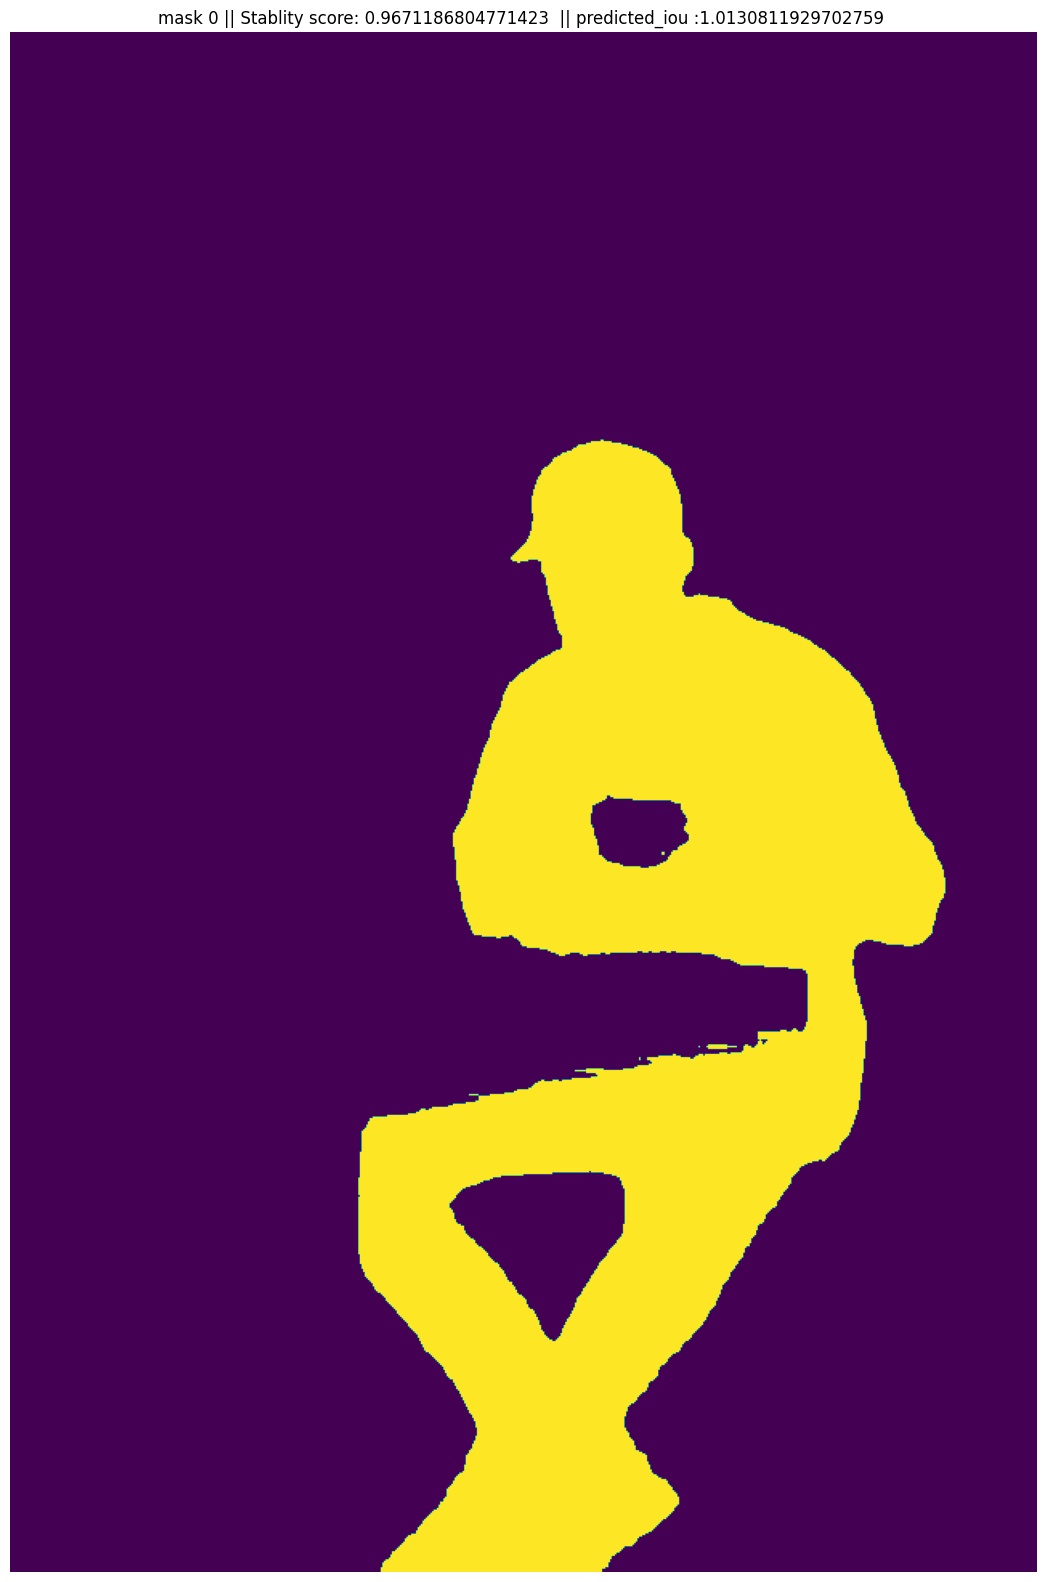

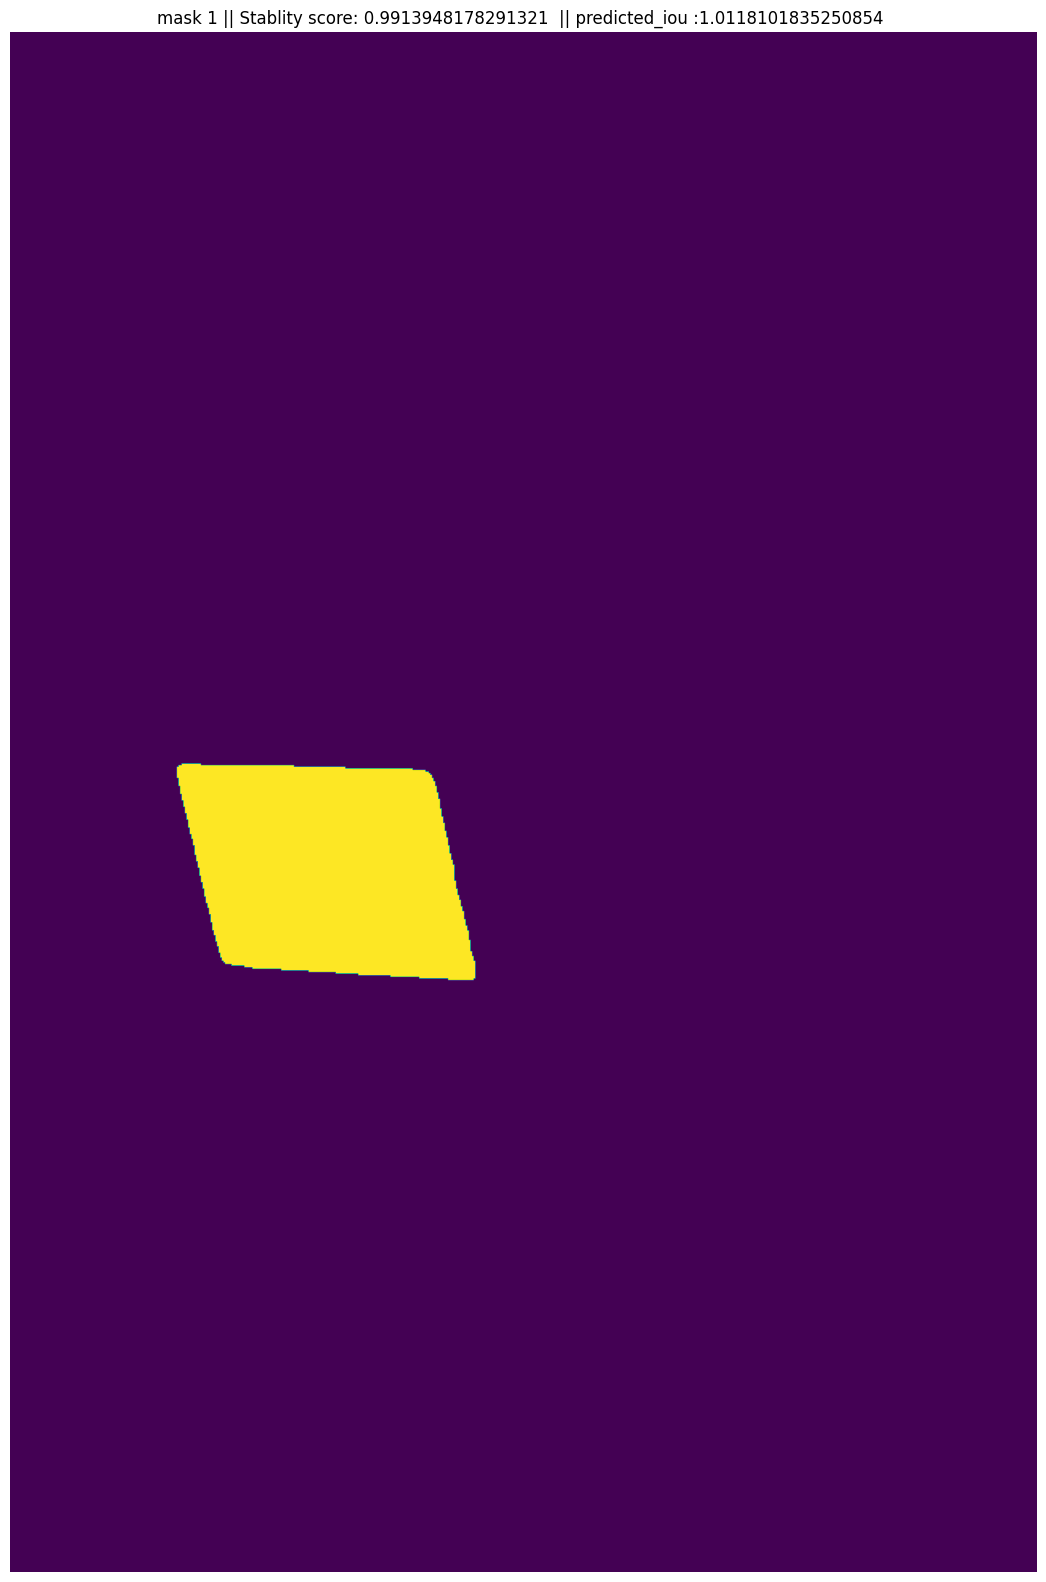

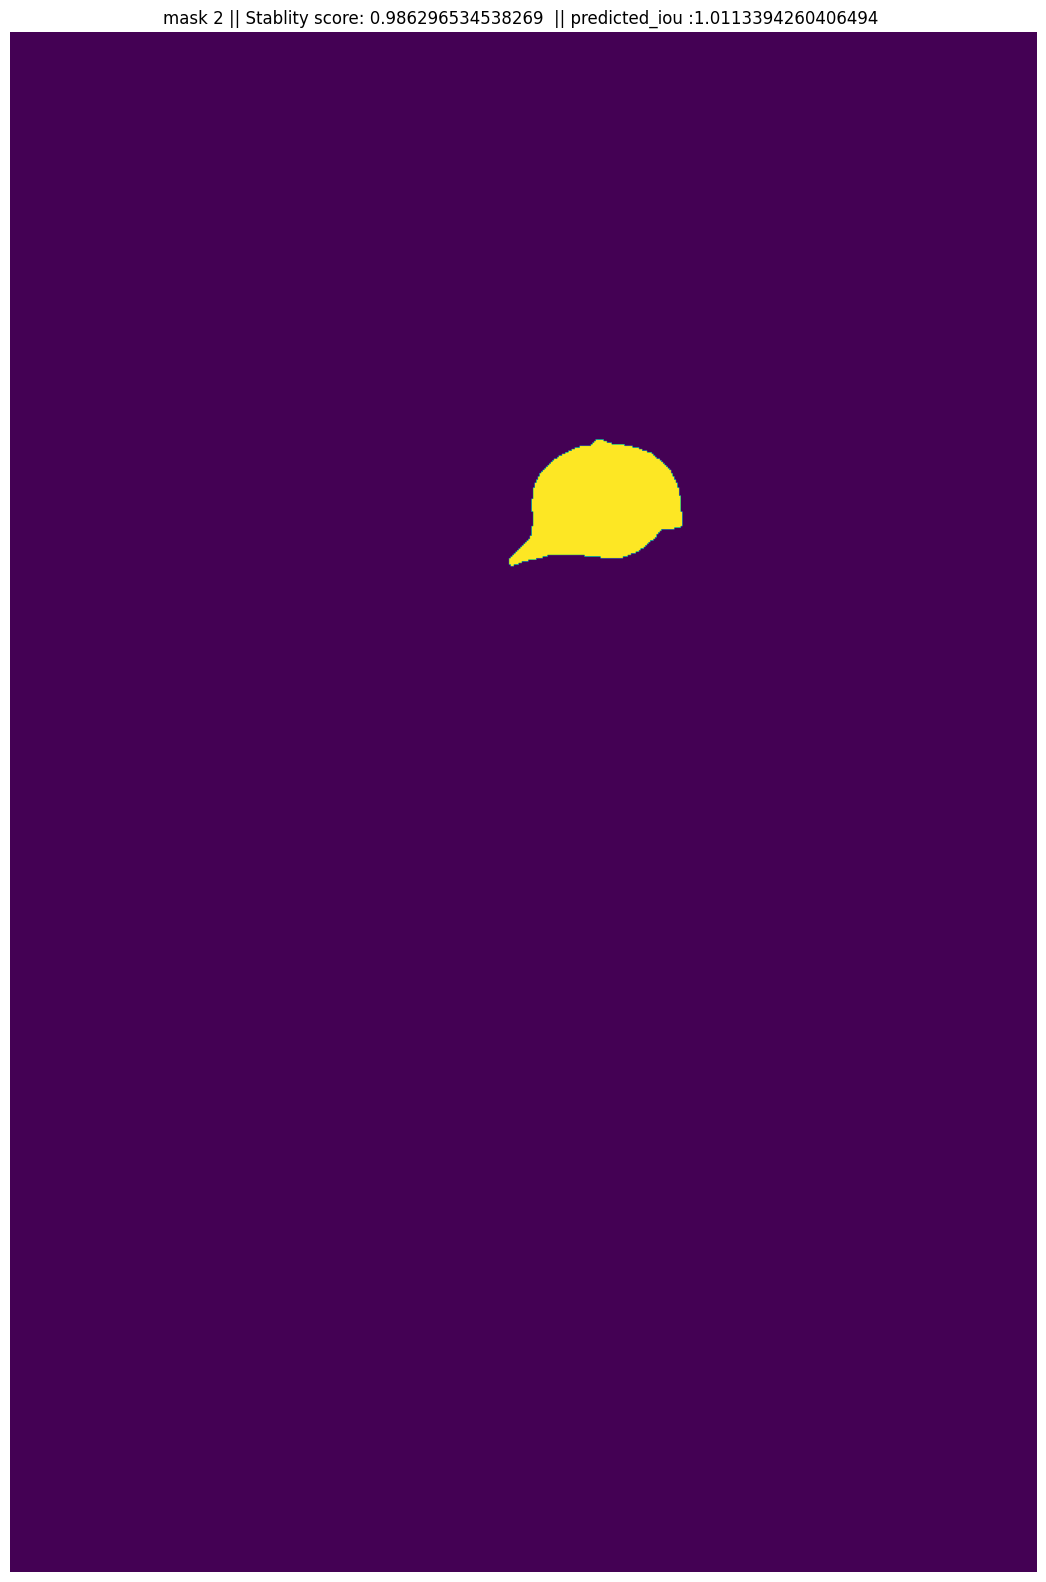

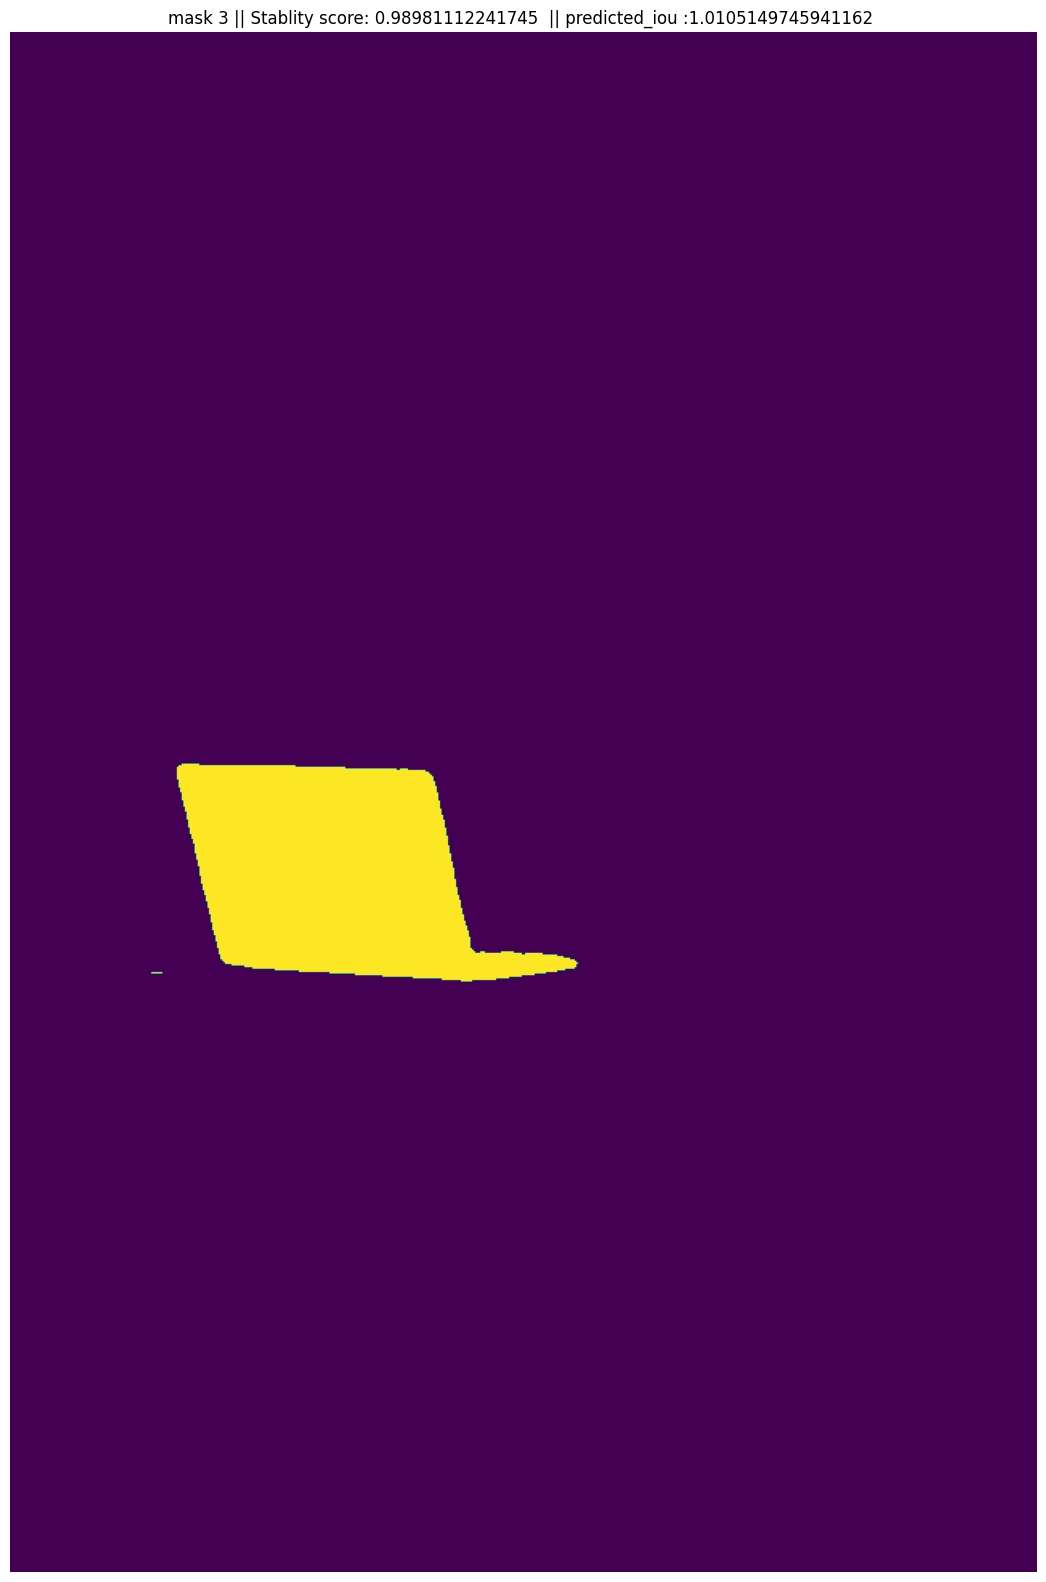

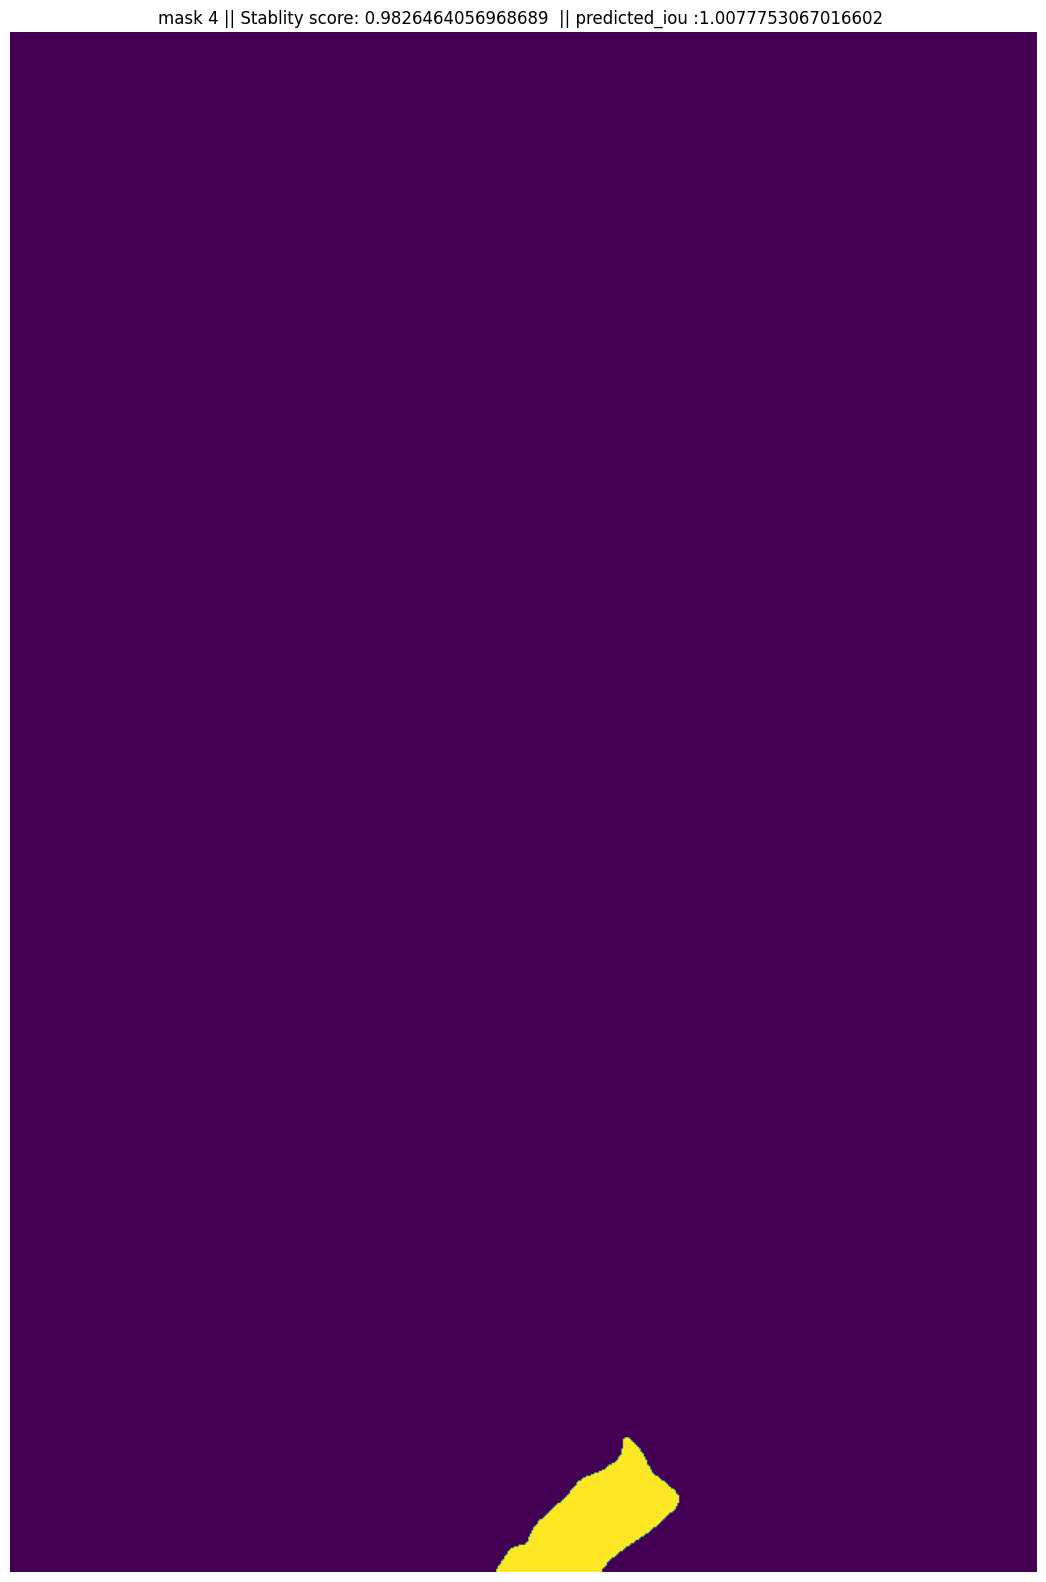

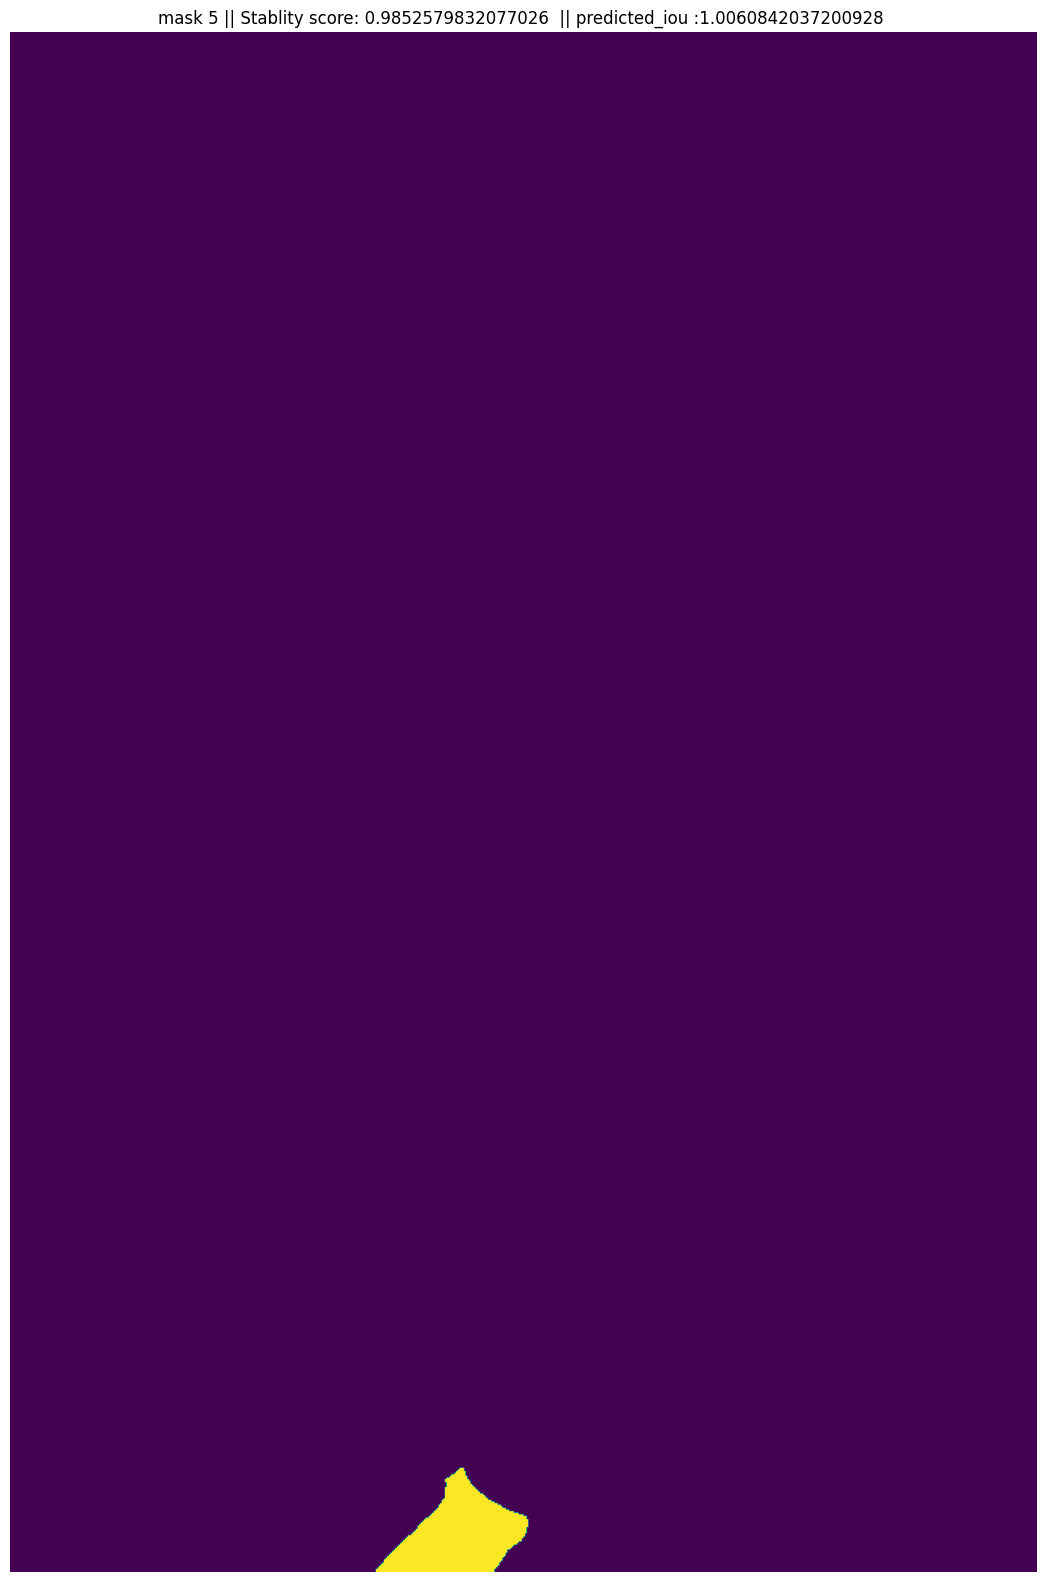

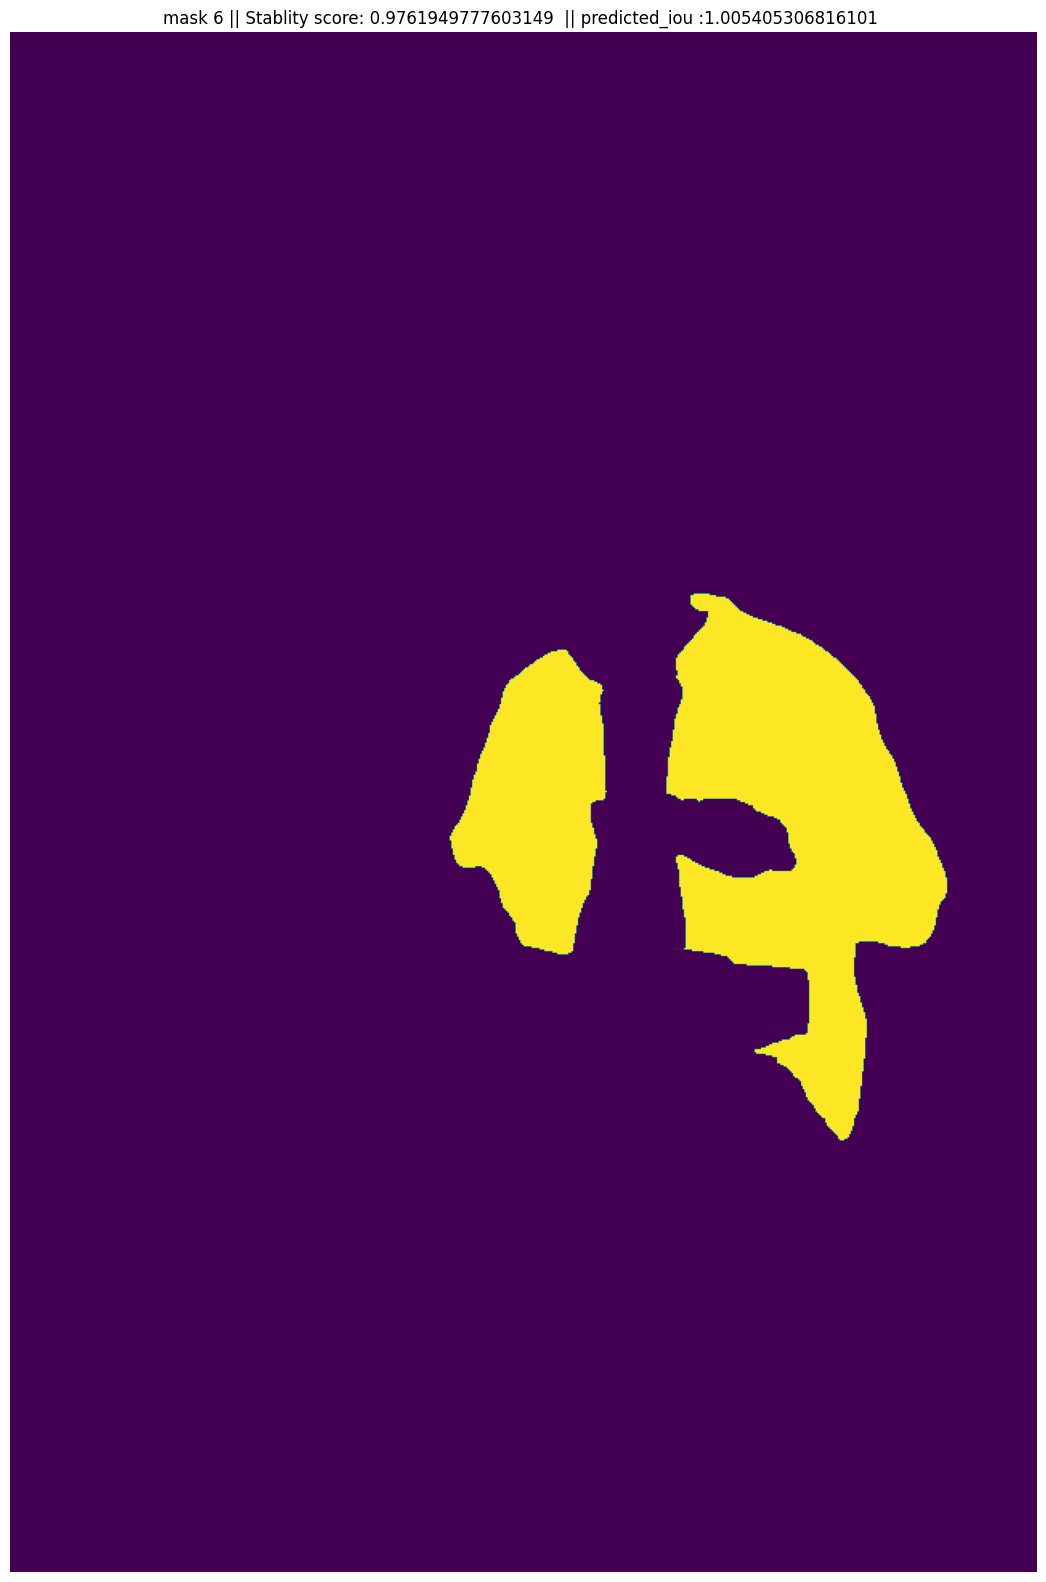

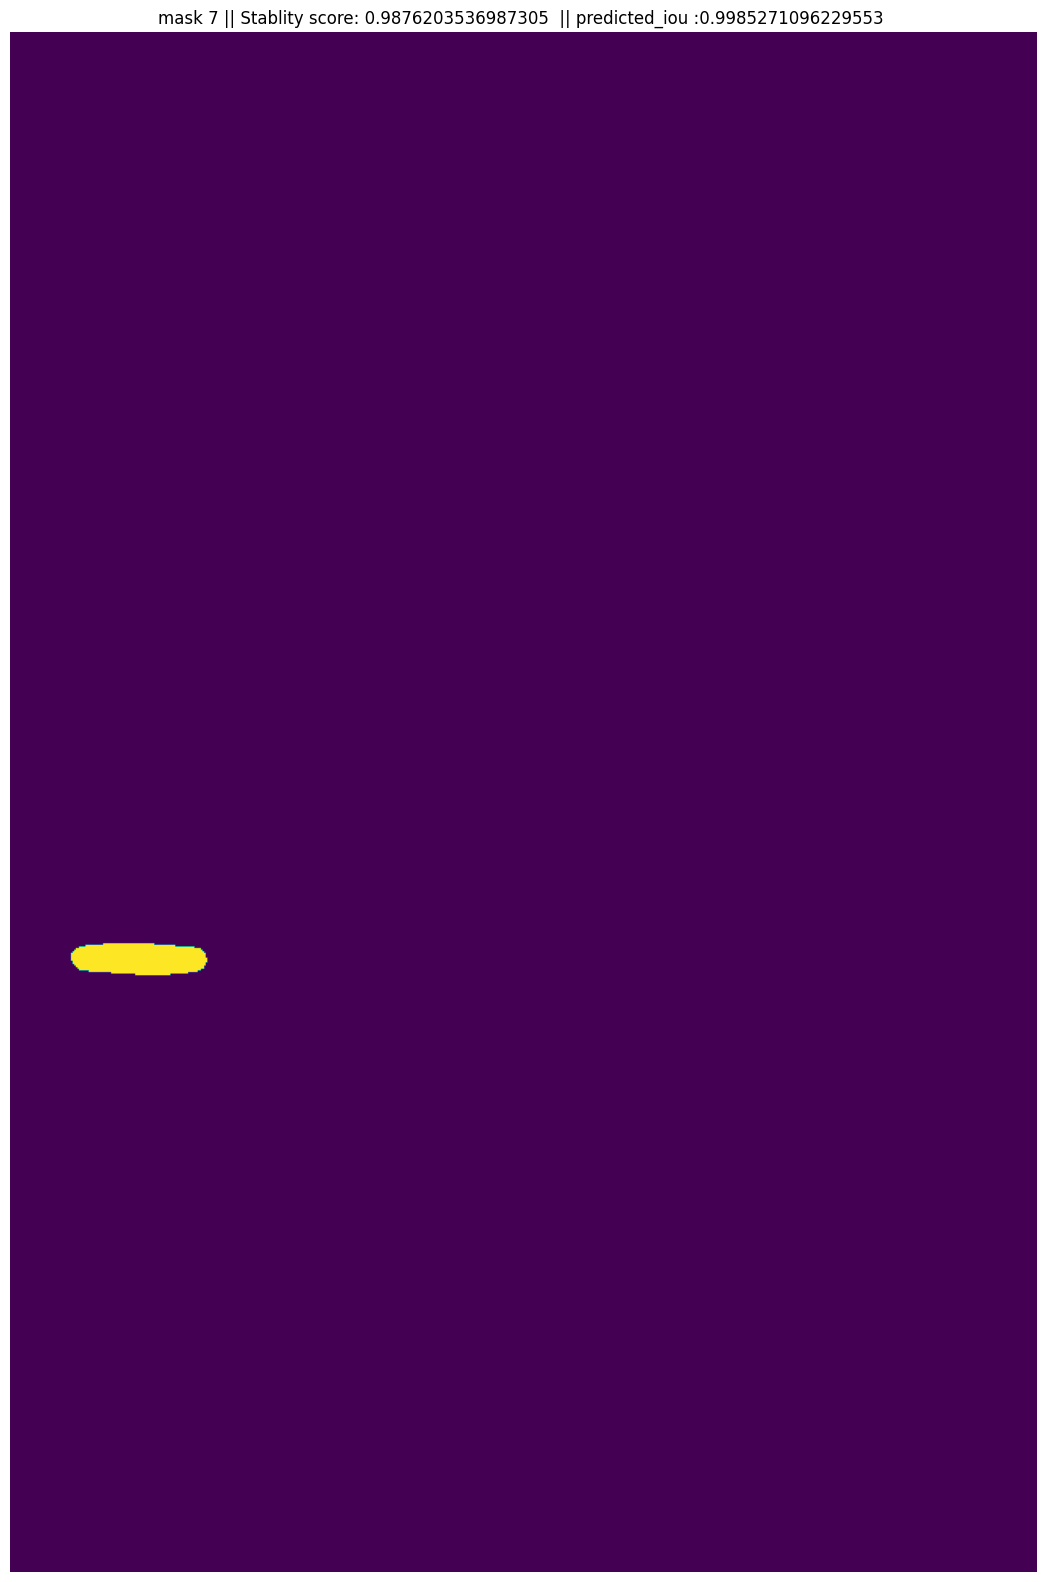

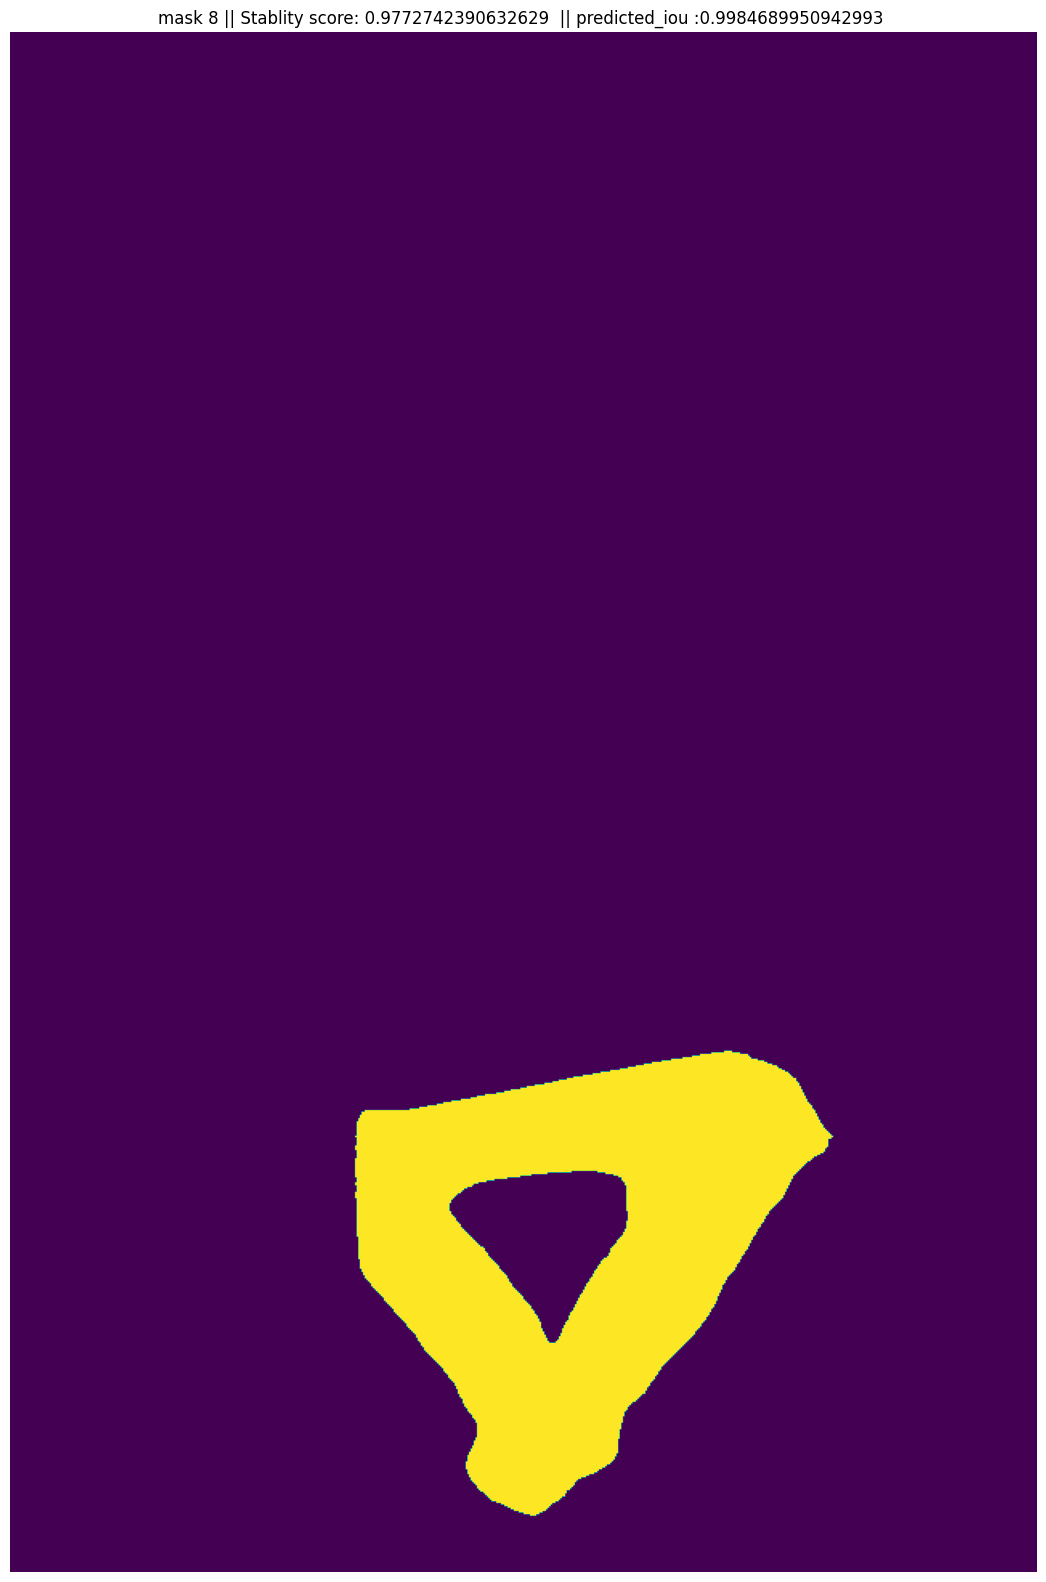

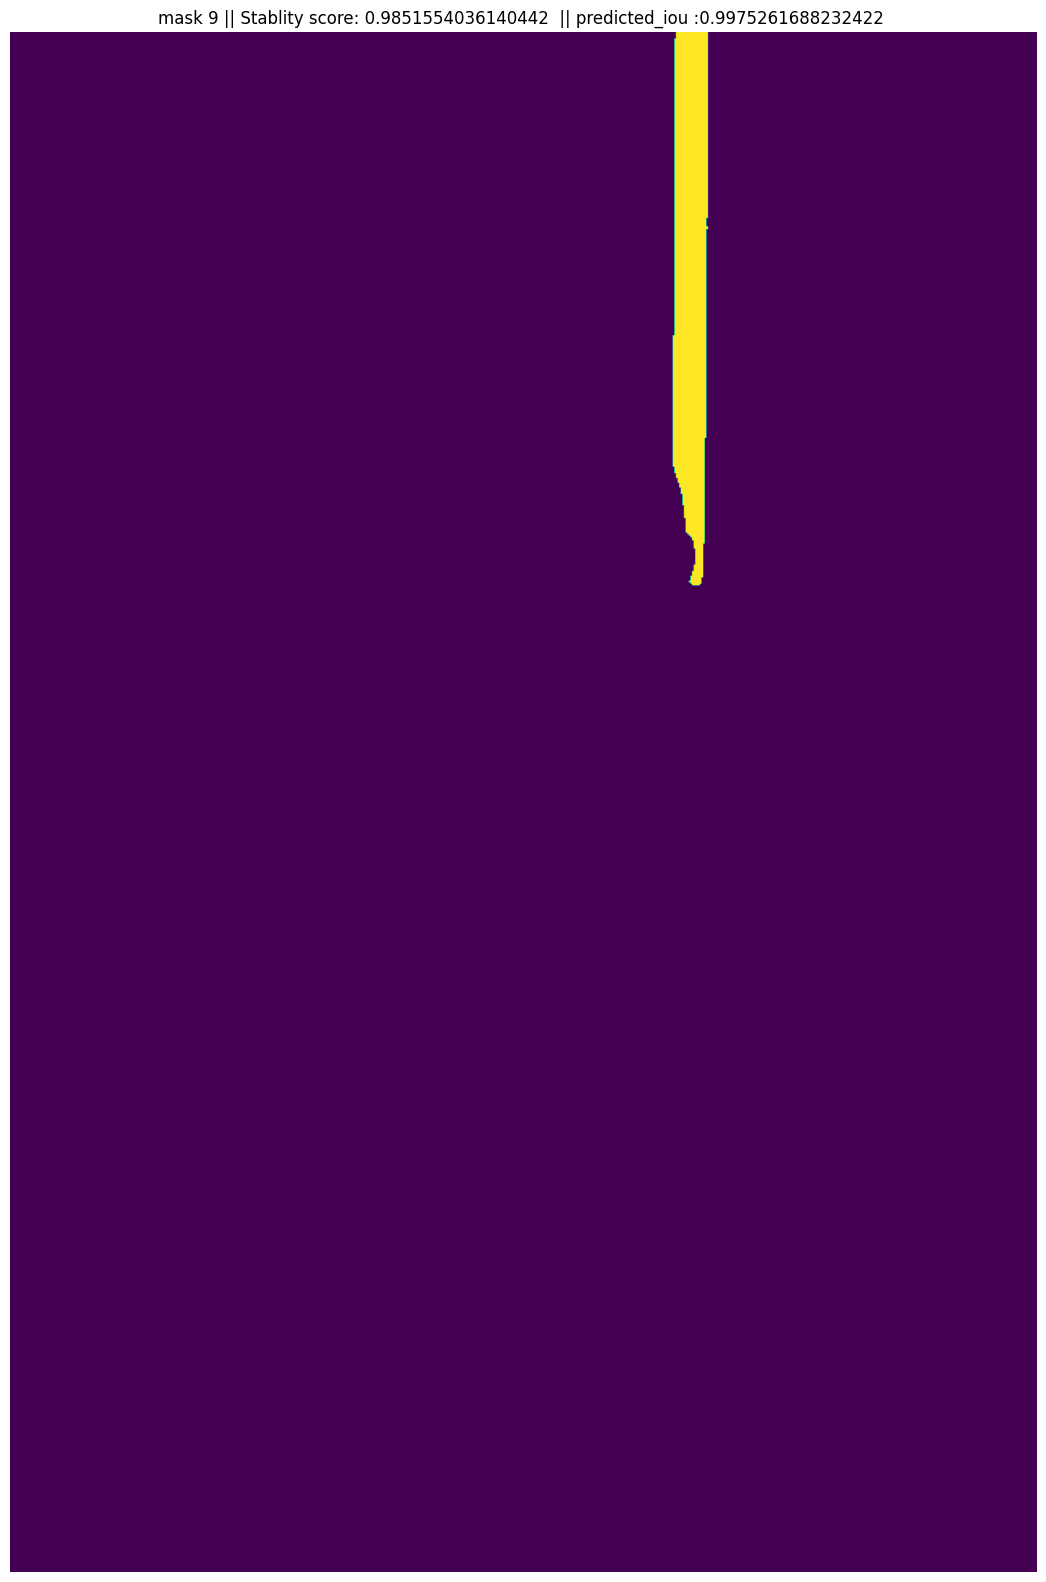

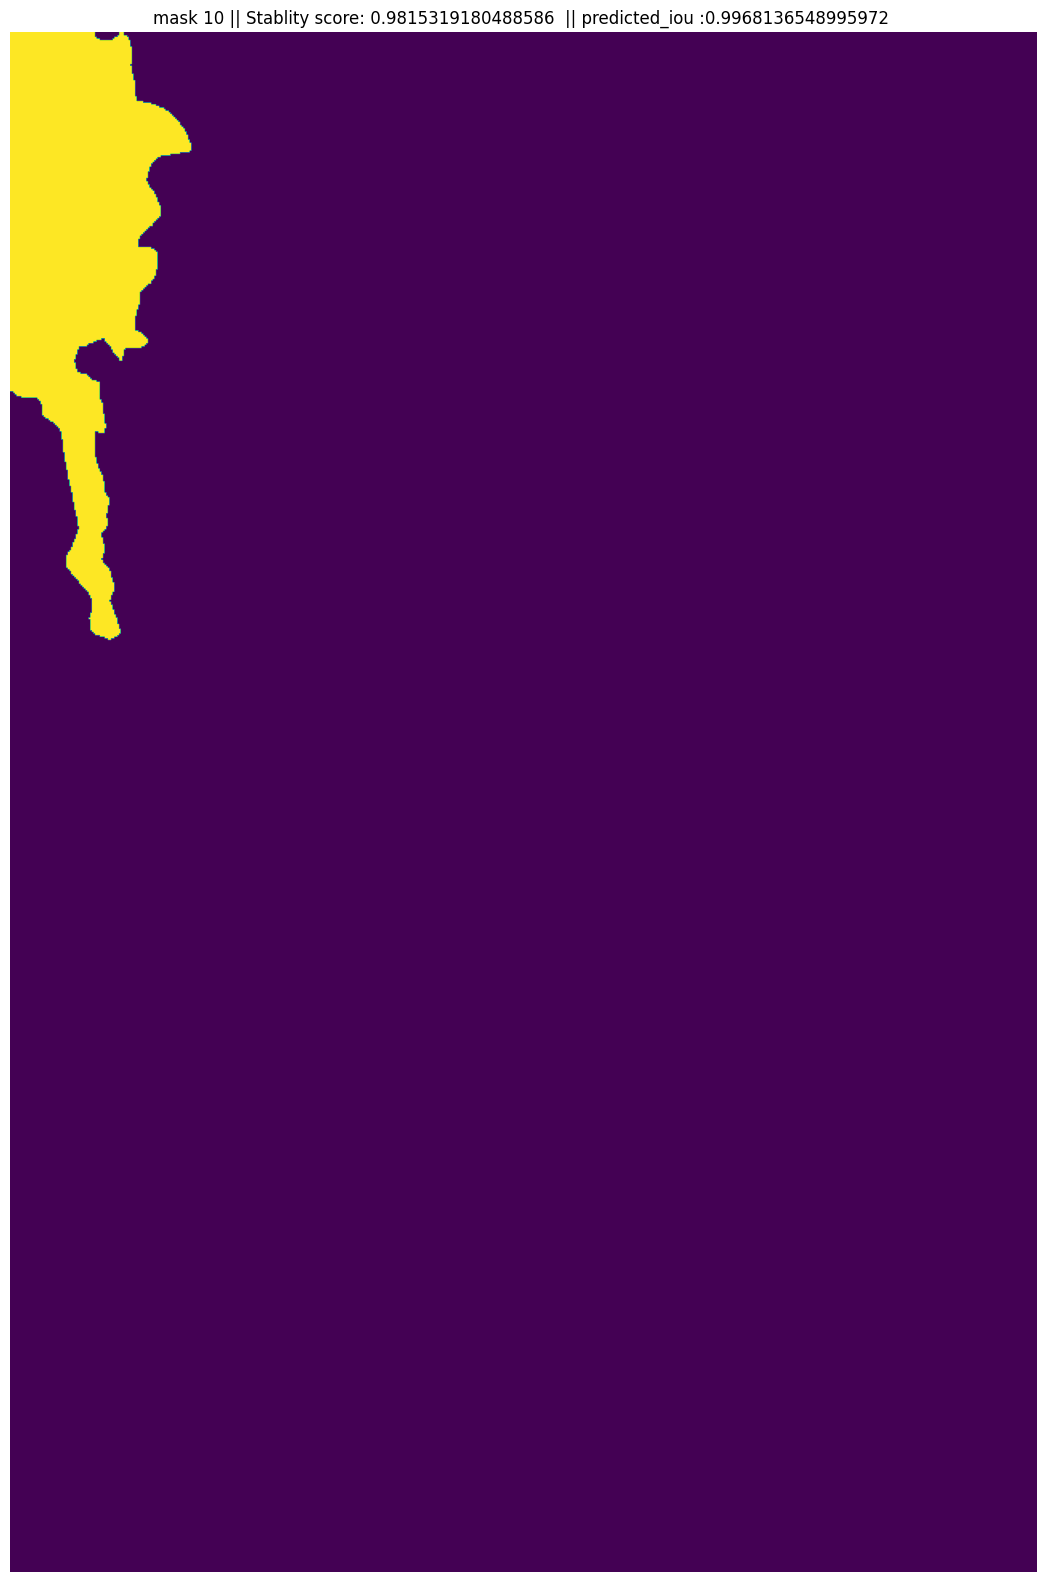

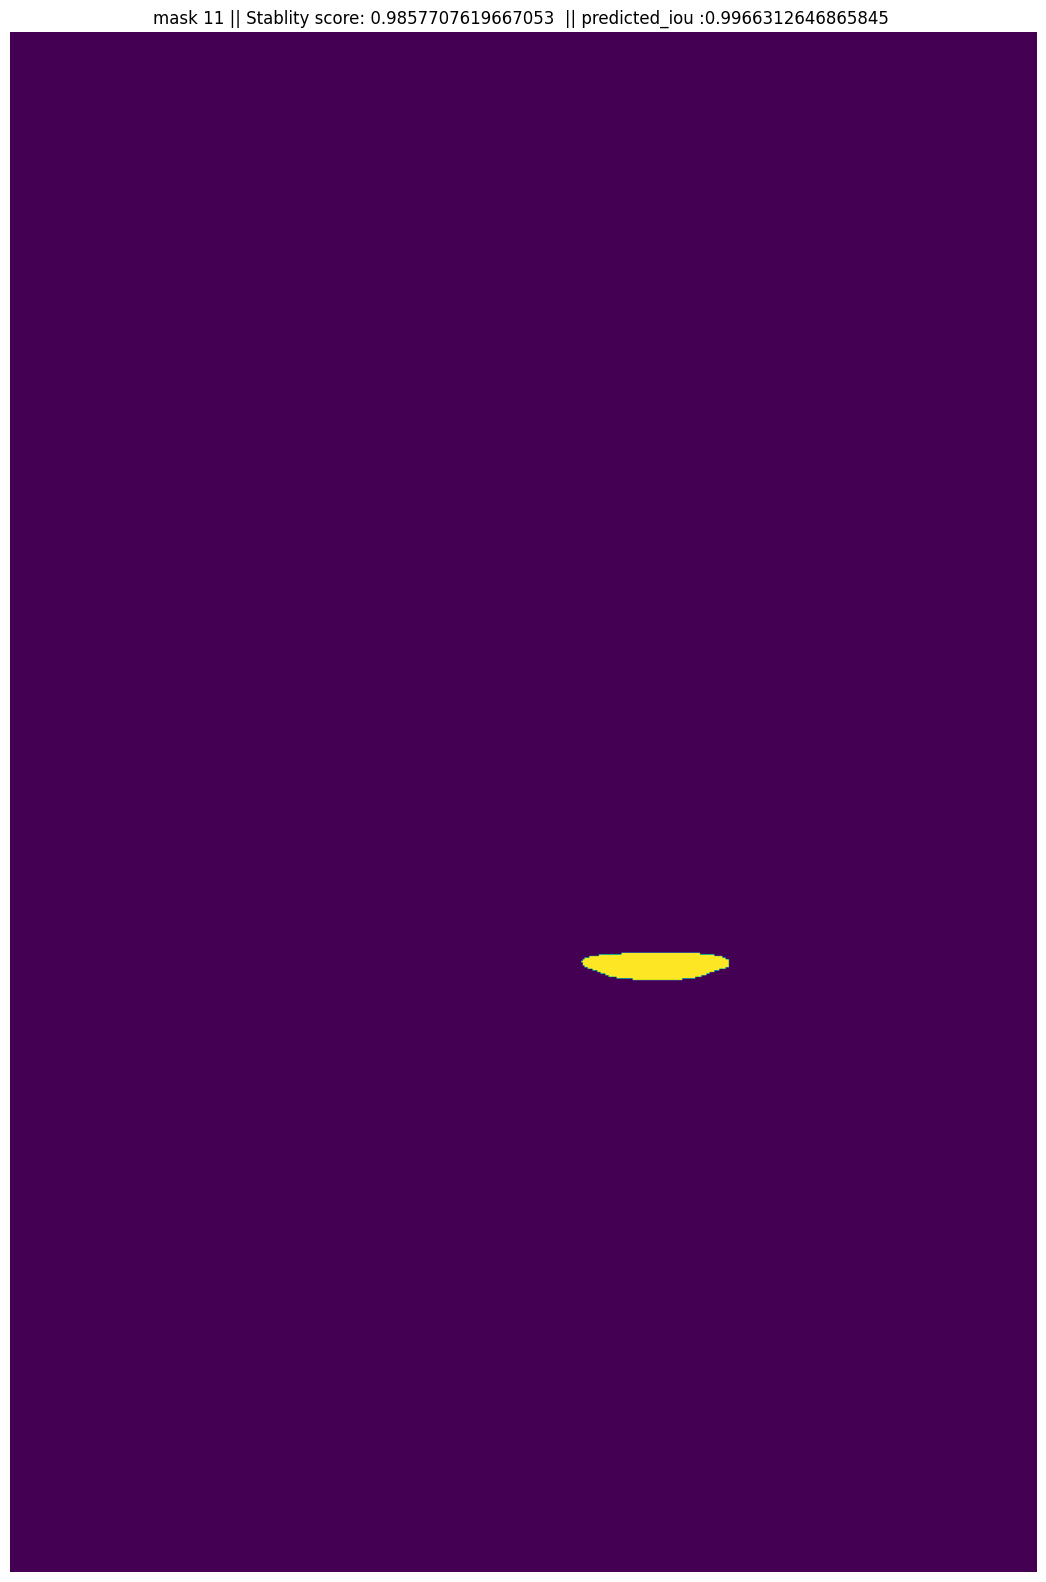

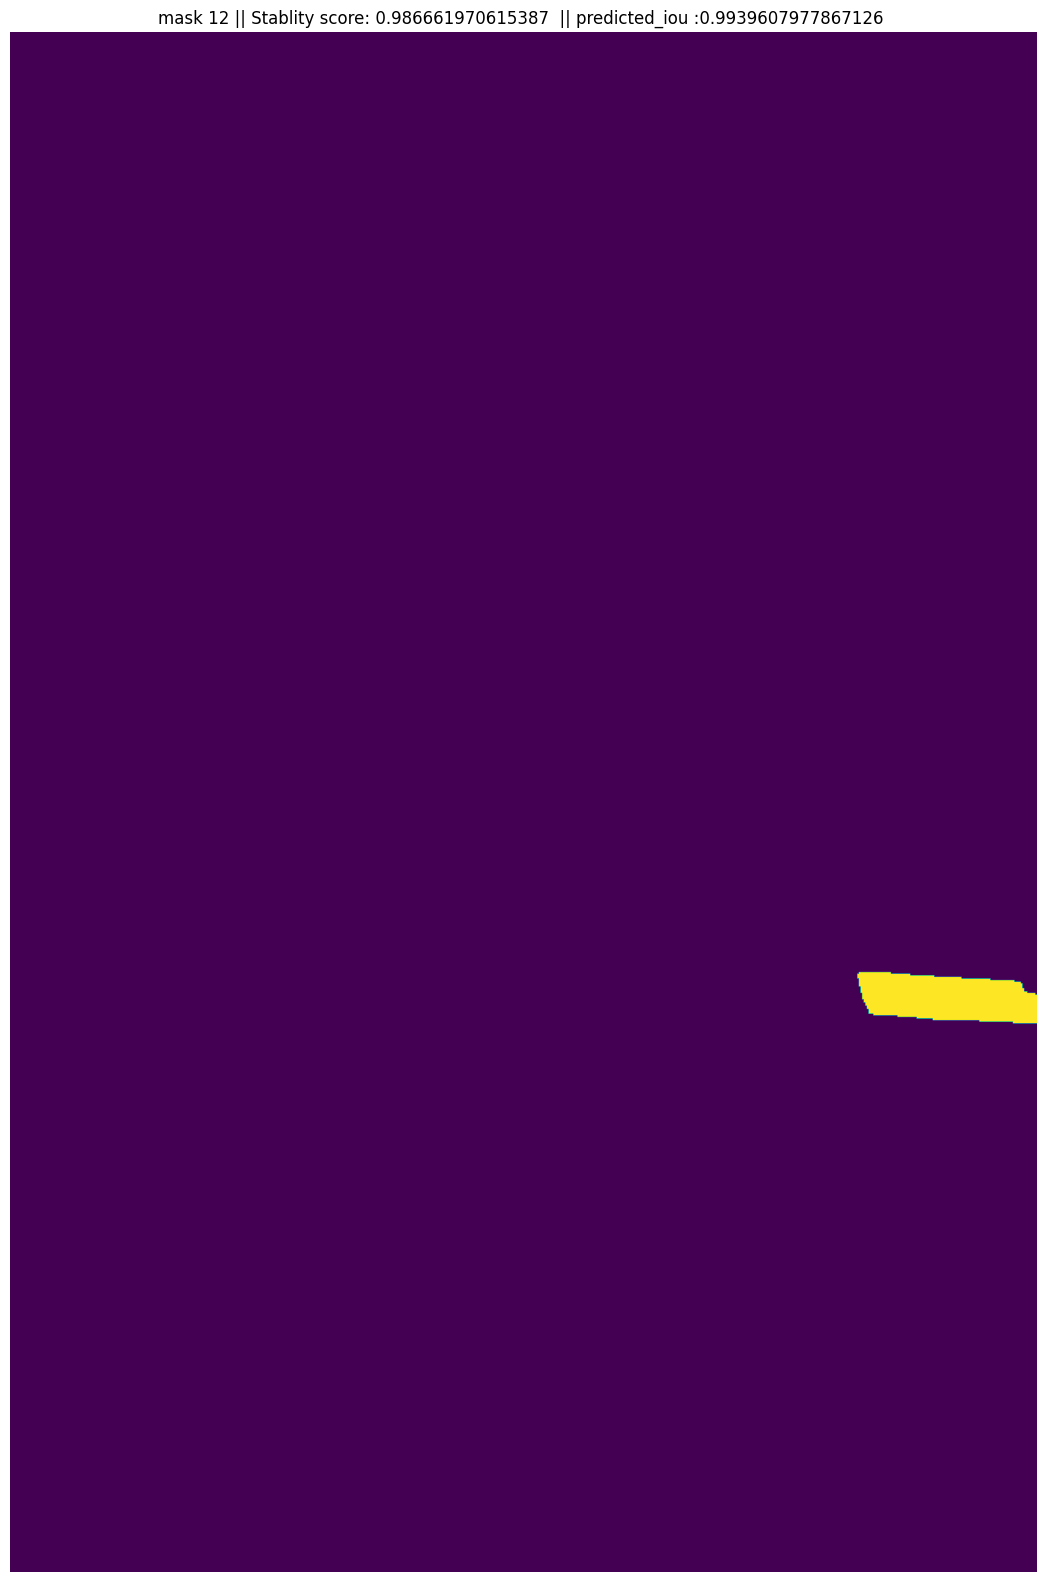

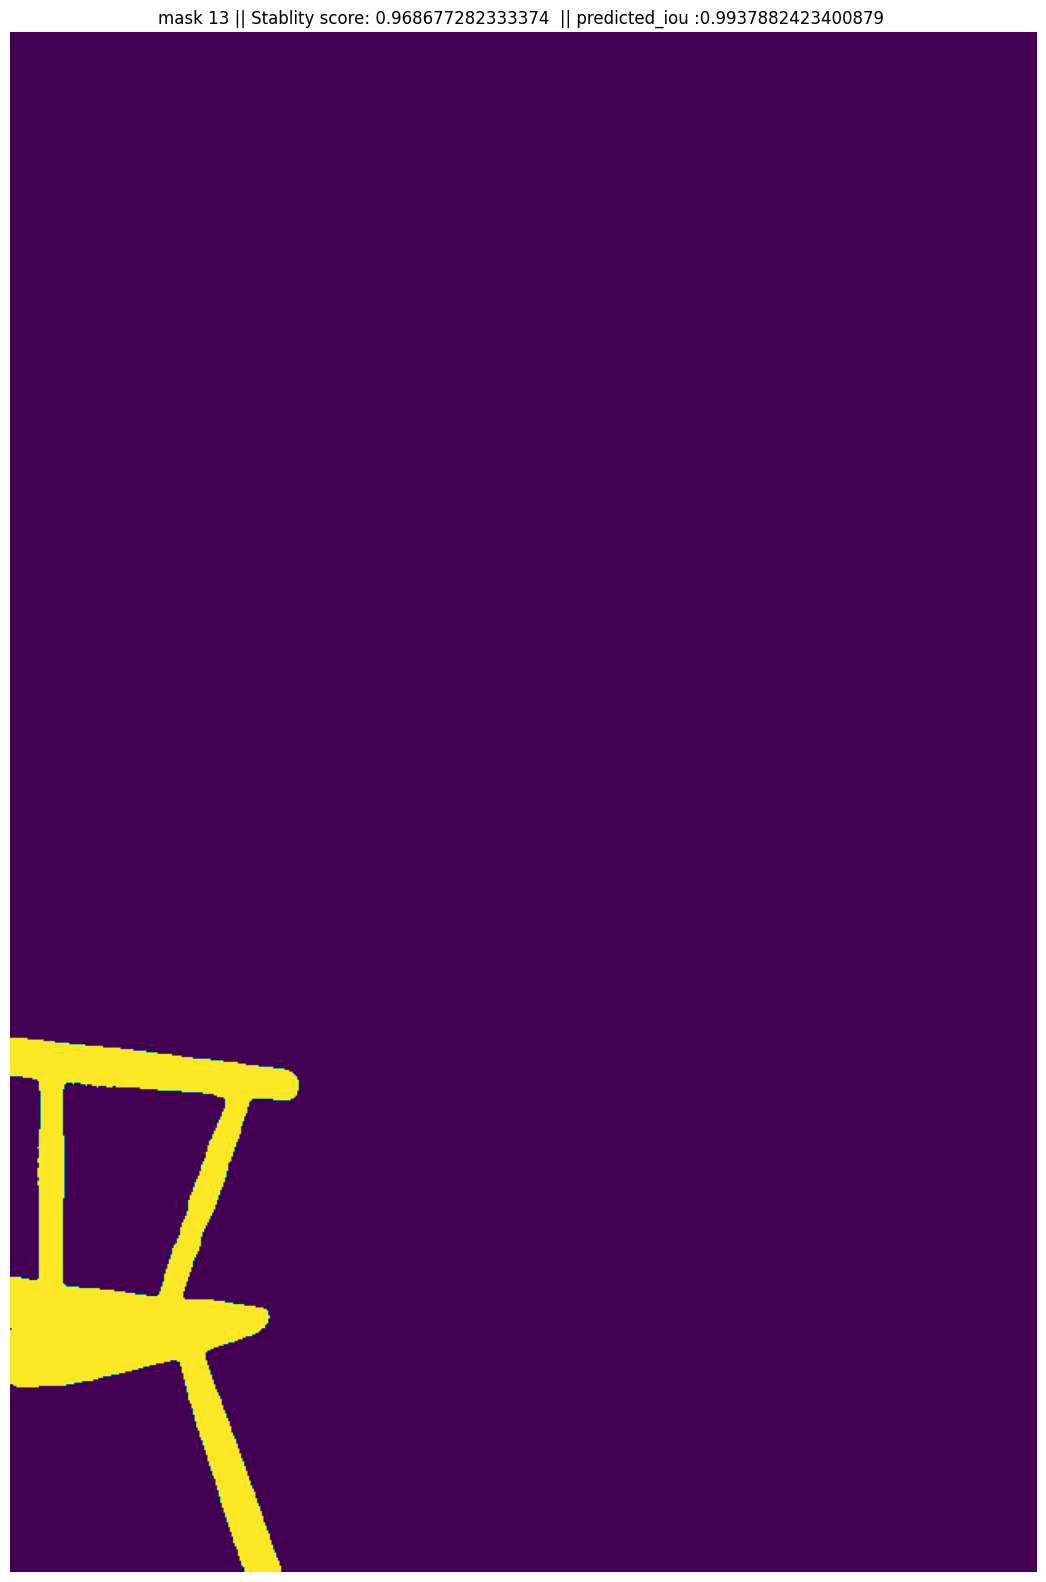

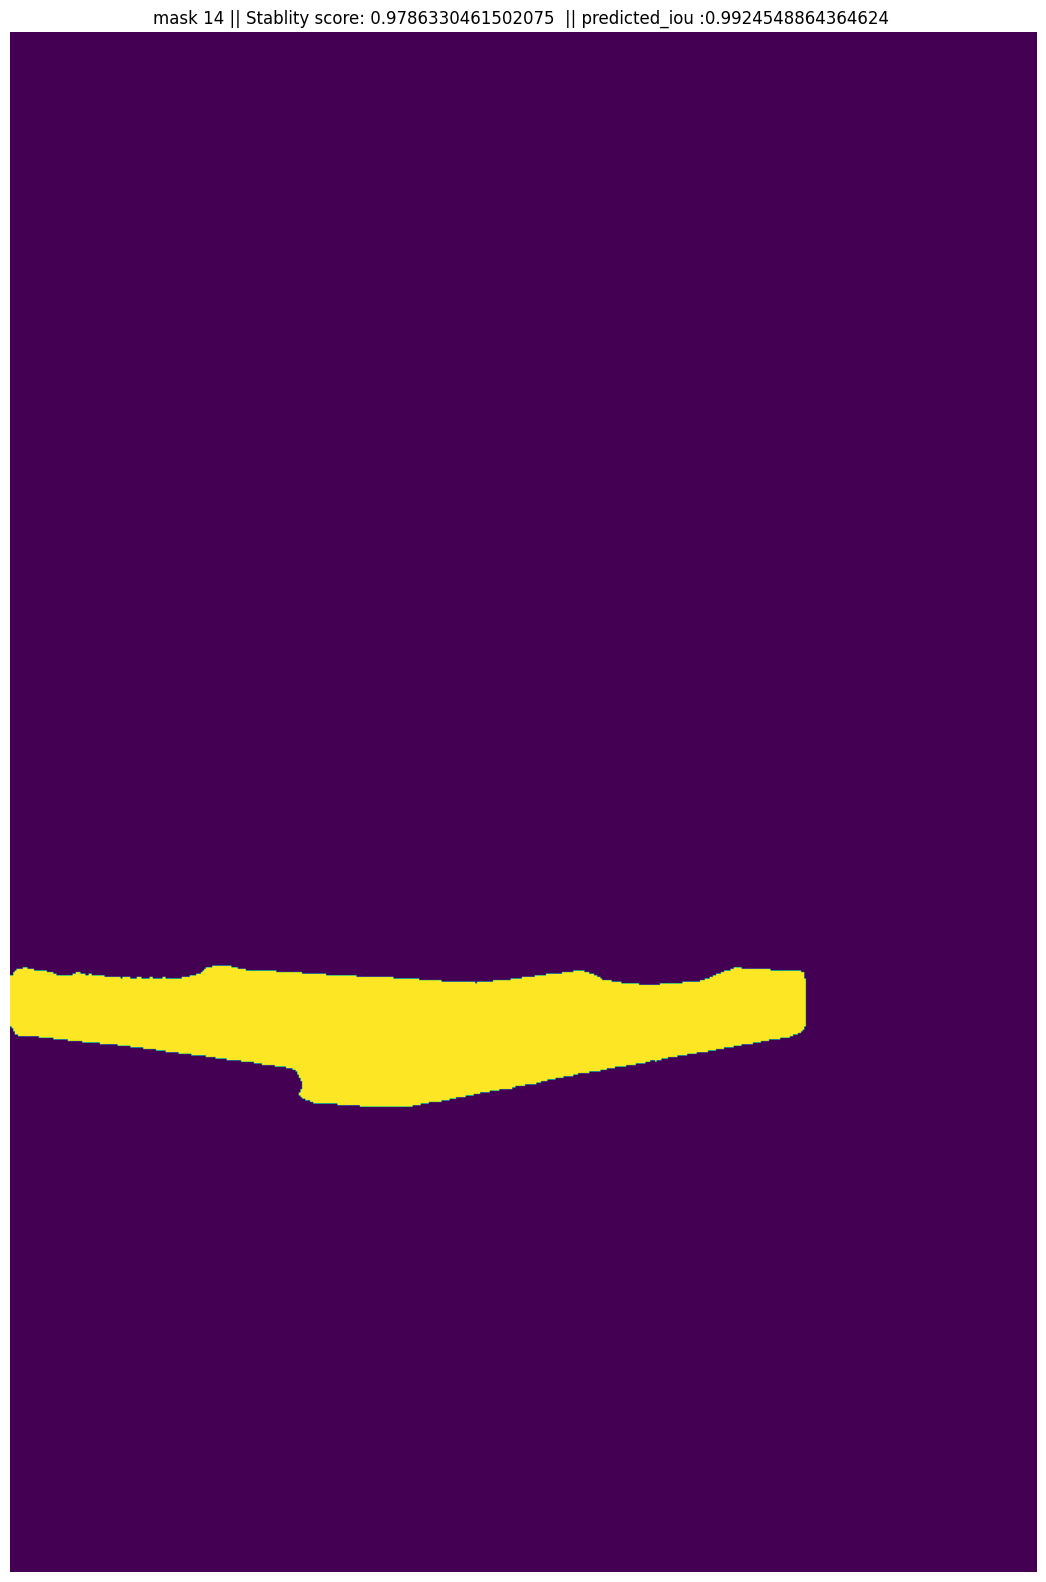

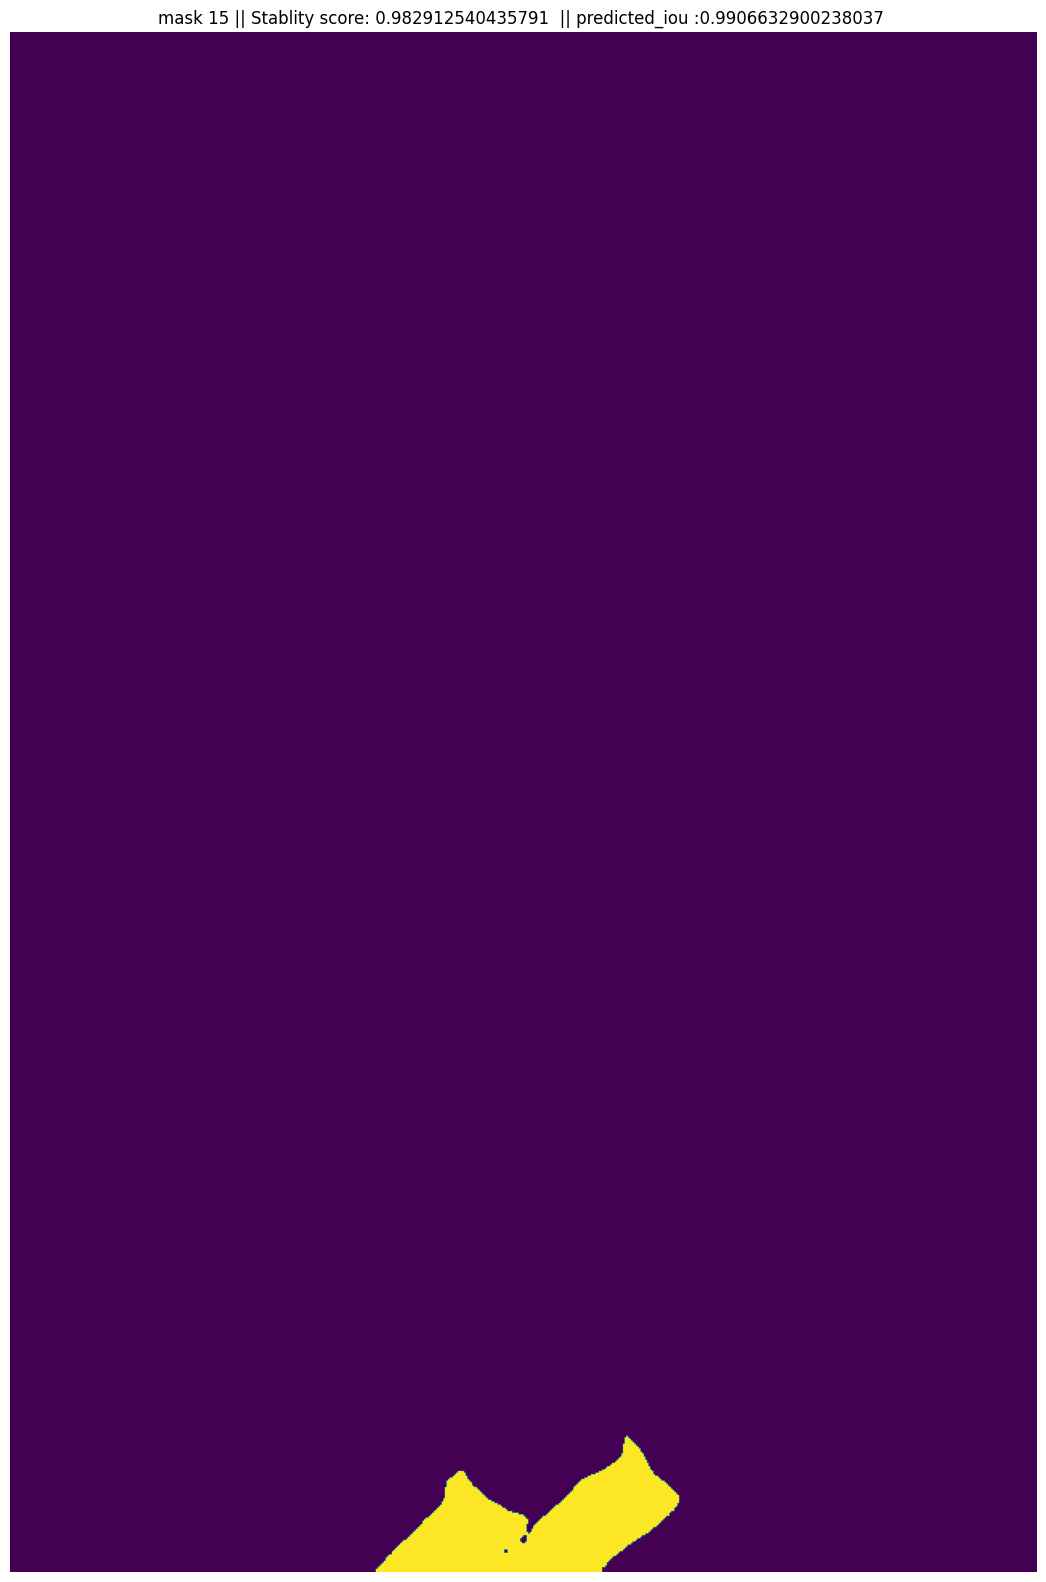

In [8]:
#iterate over all mask in masks folder
#checking the predicted score and stability score
from PIL import Image
import matplotlib.pyplot as plt
for i in range(len(masks)):
    if(masks[i]["predicted_iou"]>=0.99):
        mask = masks[i]["segmentation"]
        plt.figure(figsize=(20,20))
        plt.imshow(mask)
        plt.title(f"mask {i} || Stablity score: {masks[i]['stability_score']}  || predicted_iou :{masks[i]['predicted_iou']} ")
        plt.axis('off')
        plt.show()

In [9]:
#delete masks folder
# import shutil
# shutil.rmtree("filter_mask")

In [10]:
# !zip -r /content/masks.zip /content/masks
# from google.colab import files
# files.download("/content/masks.zip")

array([[[  0,  29,  21],
        [  0,  28,  20],
        [  1,  26,  20],
        ...,
        [ 75,  76,  78],
        [ 78,  82,  83],
        [ 75,  79,  80]],

       [[  0,  26,  19],
        [  0,  27,  20],
        [  1,  26,  20],
        ...,
        [ 76,  77,  79],
        [ 77,  81,  82],
        [ 72,  76,  77]],

       [[  0,  21,  15],
        [  0,  23,  17],
        [  2,  25,  19],
        ...,
        [ 78,  79,  81],
        [ 76,  80,  81],
        [ 71,  75,  76]],

       ...,

       [[116, 112, 103],
        [113, 109, 100],
        [111, 107,  98],
        ...,
        [  7,  18,  14],
        [  7,  18,  14],
        [  7,  18,  14]],

       [[118, 114, 105],
        [115, 111, 102],
        [113, 109, 100],
        ...,
        [  7,  19,  17],
        [  7,  19,  15],
        [  7,  19,  15]],

       [[119, 115, 106],
        [116, 112, 103],
        [114, 110, 101],
        ...,
        [  7,  19,  17],
        [  7,  19,  15],
        [  7,  19,  15]]], dtype=uint8)
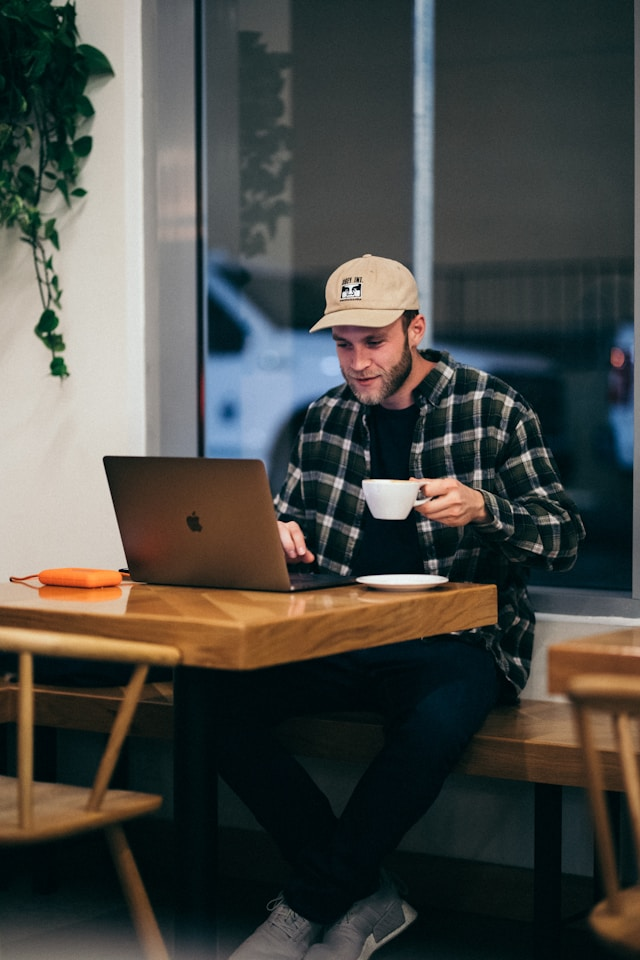

In [9]:
image

In [10]:
import cv2
image = cv2.imread('man.jpg')
mask = masks[0]["segmentation"]
os.makedirs("image_masks", exist_ok=True)
#merge mask with image
for i in range(len(masks)):
    if(masks[i]["predicted_iou"]>=0.99):
      mask = cv2.imread(f'/content/masks/{i}.png', cv2.IMREAD_GRAYSCALE)
      mask=np.where(mask > 127, 255, 0).astype(np.uint8)
      result = cv2.bitwise_and(image, image, mask=mask)
      img=cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
      img=Image.fromarray(img)
      img.save("image_masks/"+str(i)+".png")

In [13]:
# !zip -r /content/image_masks.zip /content/image_masks
# from google.colab import files
# files.download("/content/image_masks.zip")

In [11]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [12]:
items = [
    "band aid",
    "bolo tie",
    "bonnet",
    "brassiere",
    "cardigan",
    "cocktail shaker",
    "cowboy boot",
    "cowboy hat",
    "crash helmet",
    "cuirass",
    "diaper",
    "face powder",
    "feather boa",
    "fur coat",
    "gasmask",
    "gown",
    "hair slide",
    "hair spray",
    "hand-held computer",
    "hand-held microcomputer",
    "hair spray",
    "kimono",
    "loafer",
    "mask",
    "miniskirt",
    "mini",
    "maillot",
    "tank suit",
    "overskirt",
    "pantyhose",
    "nylons",
    "nylons",
    "purse",
    "running shoe",
    "sarong",
    "ski mask",
    "sleeping bag",
    "stole",
    "suit",
    "suit of clothes",
    "sunscreen",
    "sunblock",
    "sun blocker",
    "sunglasses",
    "dark glasses",
    "shades",
    "sweater",
    "swimsuit",
    "bathing suit",
    "swimming costume",
    "swimming trunks",
    "bathing trunks",
    "wetsuit",
    "wool",
    "woolen",
    "woollen",
    "wristwatch",
    "beer bottle",
    "bottlecap",
    "pill bottle",
    "pop bottle",
    "soda bottle",
    "water bottle",
    "wine bottle",
    "abaya",
    "bow tie, bow-tie, bowtie",
    "syringe",
    "lampshade, lamp shade",
    "grand piano, grand",
    "umbrella"
]

In [13]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import os
import matplotlib.pyplot as plt
# Define the path to the folder containing images
folder_path = "/content/image_masks"#editable earlier
#list of important mask
important_masks = []
# Initialize ViTImageProcessor and ViTForImageClassification
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Iterate through each image file
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    # Process the image
    inputs = processor(images=image, return_tensors="pt")

    # Make predictions
    outputs = model(**inputs)
    logits = outputs.logits

    # Get the predicted class index
    predicted_class_idx = logits.argmax(-1).item()
    predicted_class_label = model.config.id2label[predicted_class_idx]

    # plt.figure(figsize=(10, 10))
    # plt.imshow(image)
    # plt.title(f"Image: {image_file}, Predicted class: {model.config.id2label[predicted_class_idx]}")
    # plt.show()

    search_string = predicted_class_label
    for item in items:
      if search_string.lower() == item.lower():
        important_masks.append(image_path)
        break

In [14]:
important_masks

['/content/image_masks/2.png',
 '/content/image_masks/3.png',
 '/content/image_masks/6.png']

In [15]:
import os
# Initialize an empty list to store the new paths
new_paths = []
file_paths=important_masks
# Iterate over each file path
for file_path in file_paths:
    # Extract the file name from the file path
    file_name = os.path.basename(file_path)
    # Concatenate the desired path prefix with the file name
    new_path = '/content/masks/' + file_name
    # Add the new path to the list
    new_paths.append(new_path)

print(new_paths)

['/content/masks/2.png', '/content/masks/3.png', '/content/masks/6.png']


In [16]:
import os
import shutil

file_paths = new_paths

# Create a new directory to store the copied images
new_directory = '/content/final_filter_masks'
os.makedirs(new_directory, exist_ok=True)

# Iterate over each file path
for file_path in file_paths:
    # Extract the file name from the file path
    file_name = os.path.basename(file_path)
    # Construct the new file path
    new_path = os.path.join(new_directory, file_name)
    # Copy the file to the new directory
    shutil.copy(file_path, new_path)

print("Images copied to:", new_directory)

Images copied to: /content/final_filter_masks


In [17]:
! git clone https://github.com/mikonvergence/ControlNetInpaint
import sys
sys.path.append('./ControlNetInpaint/')

Cloning into 'ControlNetInpaint'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 88 (delta 27), reused 19 (delta 18), pack-reused 54
Receiving objects: 100% (88/88), 15.06 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [18]:
from diffusers import StableDiffusionInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from ControlNetInpaint.src import *
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt

In [57]:
from PIL import Image
image = Image.open('man.jpg')
mask = Image.open("/content/final_filter_masks/3.png")

In [58]:
image.size, mask.size

((640, 960), (640, 960))

In [59]:
image = np.array(image)
mask_image = np.array(mask)

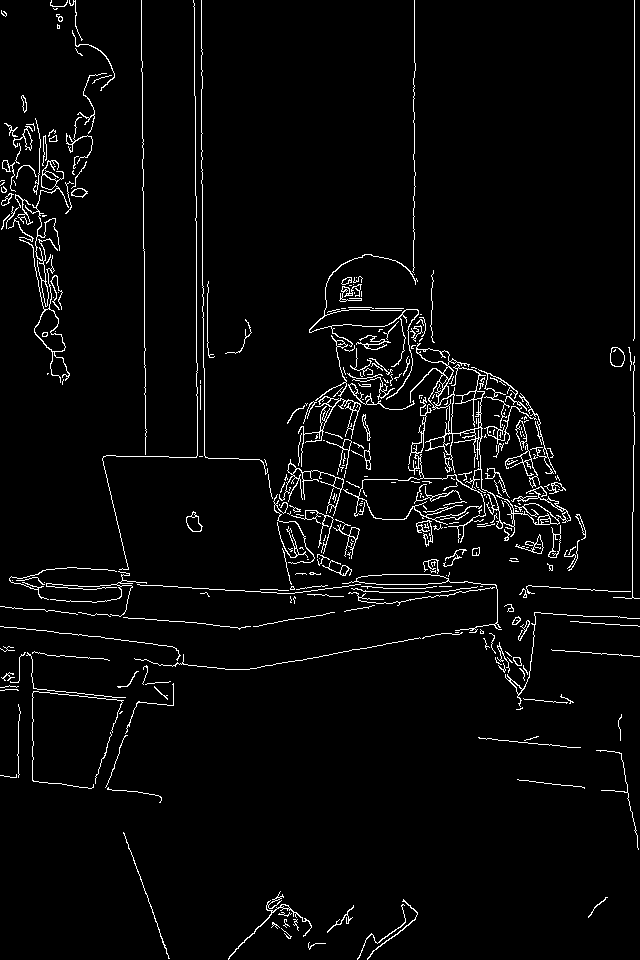

In [60]:
canny_image = cv2.Canny(image, 100, 200)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)

image=Image.fromarray(image)
mask_image=Image.fromarray(mask_image)
canny_image = Image.fromarray(canny_image)

canny_image

In [61]:
pipe_sd = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
)
# speed up diffusion process with faster scheduler and memory optimization
pipe_sd.scheduler = UniPCMultistepScheduler.from_config(pipe_sd.scheduler.config)
# remove following line if xformers is not installed
pipe_sd.enable_xformers_memory_efficient_attention()

pipe_sd.to('cuda')

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "runwayml/stable-diffusion-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [62]:
# load control net and stable diffusion v1-5
from diffusers import StableDiffusionControlNetInpaintPipeline
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     "runwayml/stable-diffusion-inpainting", controlnet=controlnet, torch_dtype=torch.float16
 )

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
pipe.enable_xformers_memory_efficient_attention()

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [63]:
text_prompt="Transform this image into a work of art by changing its style and color palette. Apply a distinct artistic style, such as impressionism, cubism, or surrealism, to give the image a unique and visually striking appearance. Experiment with brush strokes, textures, and effects to achieve the desired artistic effect while maintaining the essence of the original scene. Additionally, adjust the color palette to evoke a specific mood or theme. For example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. The goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece."

In [64]:
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

Token indices sequence length is longer than the specified maximum sequence length for this model (141 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['palette to evoke a specific mood or theme. for example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. the goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece.']


  0%|          | 0/20 [00:00<?, ?it/s]

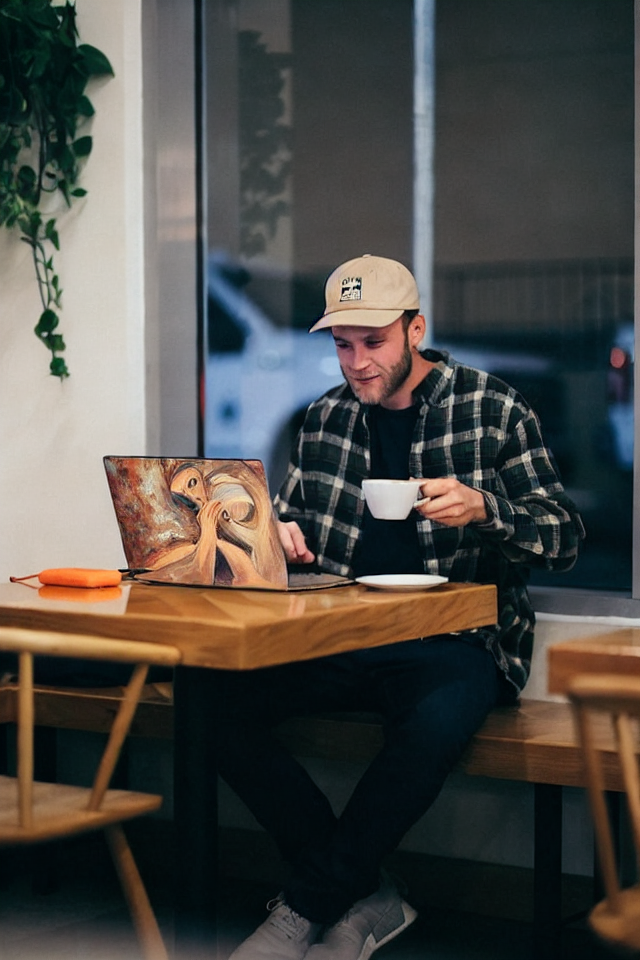

In [65]:
pipe.to('cuda')

# generate image
generator = torch.manual_seed(42)
new_image = pipe(
    text_prompt,
    num_inference_steps=20,
    generator=generator,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0.5,
    mask_image=mask_image
).images[0]

new_image

In [39]:
def image_enhance(image, mask):
  import cv2
  from PIL import Image
  import numpy as np
  import torch
  from matplotlib import pyplot as plt
  image = np.array(image)
  mask_image = np.array(mask)
  canny_image = cv2.Canny(image, 100, 200)
  canny_image = canny_image[:, :, None]
  canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)

  image=Image.fromarray(image)
  mask_image=Image.fromarray(mask_image)
  canny_image = Image.fromarray(canny_image)
  pipe_sd = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
  )
  # speed up diffusion process with faster scheduler and memory optimization
  pipe_sd.scheduler = UniPCMultistepScheduler.from_config(pipe_sd.scheduler.config)
  # remove following line if xformers is not installed
  pipe_sd.enable_xformers_memory_efficient_attention()

  pipe_sd.to('cuda')
  # load control net and stable diffusion v1-5
  from diffusers import StableDiffusionControlNetInpaintPipeline
  controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
  pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
      "runwayml/stable-diffusion-inpainting", controlnet=controlnet, torch_dtype=torch.float16
  )

  # speed up diffusion process with faster scheduler and memory optimization
  pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
  # remove following line if xformers is not installed
  pipe.enable_xformers_memory_efficient_attention()
  text_prompt="Transform this image into a work of art by changing its style and color palette. Apply a distinct artistic style, such as impressionism, cubism, or surrealism, to give the image a unique and visually striking appearance. Experiment with brush strokes, textures, and effects to achieve the desired artistic effect while maintaining the essence of the original scene. Additionally, adjust the color palette to evoke a specific mood or theme. For example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. The goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece."
  import os
  os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
  pipe.to('cuda')

  # generate image
  generator = torch.manual_seed(42)
  new_image = pipe(
      text_prompt,
      num_inference_steps=20,
      generator=generator,
      image=image,
      control_image=canny_image,
      controlnet_conditioning_scale = 0.5,
      mask_image=mask_image
  ).images[0]

  return new_image

In [40]:
image=Image.open("man.jpg")
mask=Image.open(new_paths[2])

In [41]:
gen_image=image_enhance(image, mask)

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (141 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['palette to evoke a specific mood or theme. for example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. the goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece.']


  0%|          | 0/20 [00:00<?, ?it/s]

In [44]:
image=Image.open("man.jpg")
update_image=image
for image_path in new_paths:
  mask=Image.open(image_path)
  update_image=image_enhance(update_image, mask)

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (141 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['palette to evoke a specific mood or theme. for example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. the goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece.']


  0%|          | 0/20 [00:00<?, ?it/s]

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (141 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['palette to evoke a specific mood or theme. for example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. the goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece.']


  0%|          | 0/20 [00:00<?, ?it/s]

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (141 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['palette to evoke a specific mood or theme. for example, infuse warm, earthy tones for a rustic and cozy feel, or opt for vibrant, psychedelic colors for a surreal and otherworldly atmosphere. the goal is to reimagine the image in a creative and expressive way, transforming it into a captivating visual masterpiece.']


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
update_image

In [1]:
update_image.save("update.jpg")

NameError: name 'update_image' is not defined